In [1]:

import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from crawlab_toolbox import plotting as genplt
from plotting import *

In [2]:
import matplotlib as mpl
print(mpl.__version__)

3.2.1


In [3]:
inferenceLocations = [r'Beaglebone','Amazon-EC2']
vibSamples = ['4096','8192','16384','32768','65536']
vibSampleLabels = [r'$2^{12}$',r'$2^{13}$',r'$2^{14}$',r'$2^{15}$',r'$2^{16}$']
basePath = 'Edge-Device-Latency/'
modelId = 'No-Vib'
deviceId = 'Amazon-EC2'
numSamples = 900
numColumns = 3

latencyVals = np.zeros((numSamples,len(inferenceLocations),len(vibSamples)))
computeVals = np.zeros((numSamples,len(inferenceLocations),len(vibSamples)))
columns = None

In [4]:
for i in range(len(vibSamples)):
    for j in range(len(inferenceLocations)):
        
        if inferenceLocations[j] == 'Beaglebone':
            modelId = 'returnPSD'
            thisDF = pd.read_csv(basePath + inferenceLocations[j] +'_' + modelId + '_' + vibSamples[i] + '.csv')
            latencyVals[:,j,i] = thisDF.values[-numSamples:,3]
            computeVals[:,j,i] = thisDF.values[-numSamples:,1] + thisDF.values[-numSamples:,2]
        else:
            modelId = 'No-Vib'
            thisDF = pd.read_csv(basePath + inferenceLocations[j] +'_' + modelId + '_' + vibSamples[i] + '.csv')
            latencyVals[:,j,i] = thisDF.values[-numSamples:,3]
            computeVals[:,j,i] = thisDF.values[-numSamples:,2]
            
        
        print(thisDF.values.shape)


        



(997, 4)
(1021, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(1000, 4)
(948, 4)
(1000, 4)
(1000, 4)


mean latency, max latency, Max Score Difference, MSE

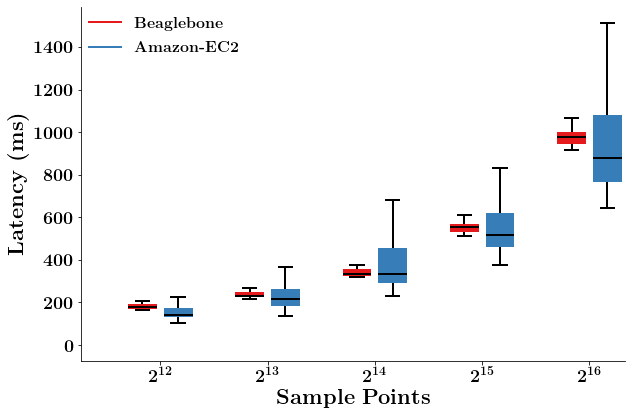

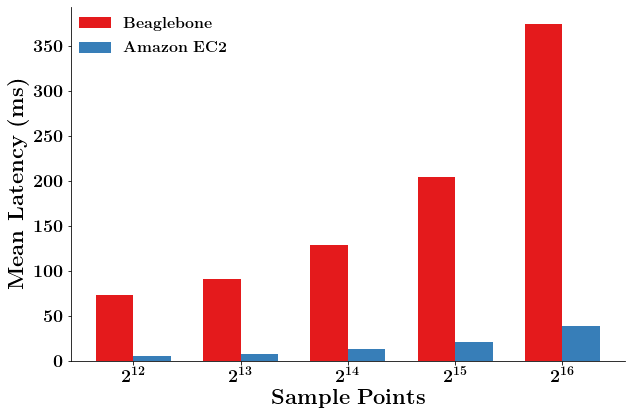

In [7]:
box_plot_compare((latencyVals),vibSampleLabels,savefig=True,filename='EdgeCloud_TotalLatency',
         template='presentation',xlabel='Sample Points',color_order=np.zeros(6).astype(int),ylabel='Latency (ms)',
         showfliers=False,legend_loc='upper left',max_cutoff=2,plot_type='box',
         log_y=False,extension='svg',inferenceLocations = [r'\textbf{Beaglebone}',r'\textbf{Amazon-EC2}'])

bar_chart_compare((computeVals),vibSampleLabels,['Beaglebone','Amazon EC2'],savefig=True,filename='EdgeVsCloud_ComputeLatency',
         template='presentation',xlabel='Sample Points',color_order=np.zeros(6).astype(int),ylabel='Mean Latency (ms)',
         showfliers=False,legend_loc='upper left',
         log_y=False,extension='svg',)

In [7]:
latencyVals.shape

(900, 2, 5)